In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

# Function for insighting summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))
    
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [3]:
df0 = pd.read_csv("heart_2020_cleaned.csv", nrows=50000)

In [4]:
df0.shape

(50000, 18)

In [5]:
df = df0

In [6]:
df.head

<bound method NDFrame.head of       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  16.60     Yes              No     No             3.0   
1               No  20.34      No              No    Yes             0.0   
2               No  26.58     Yes              No     No            20.0   
3               No  24.21      No              No     No             0.0   
4               No  23.71      No              No     No            28.0   
...            ...    ...     ...             ...    ...             ...   
49995           No  21.62      No              No     No             0.0   
49996           No  35.26      No              No     No             0.0   
49997           No  28.17      No              No     No             0.0   
49998           No  27.02     Yes              No     No             4.0   
49999           No  26.68     Yes              No     No             0.0   

       MentalHealth DiffWalking     Sex  AgeCategory     

In [7]:
df.sample

<bound method NDFrame.sample of       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  16.60     Yes              No     No             3.0   
1               No  20.34      No              No    Yes             0.0   
2               No  26.58     Yes              No     No            20.0   
3               No  24.21      No              No     No             0.0   
4               No  23.71      No              No     No            28.0   
...            ...    ...     ...             ...    ...             ...   
49995           No  21.62      No              No     No             0.0   
49996           No  35.26      No              No     No             0.0   
49997           No  28.17      No              No     No             0.0   
49998           No  27.02     Yes              No     No             4.0   
49999           No  26.68     Yes              No     No             0.0   

       MentalHealth DiffWalking     Sex  AgeCategory   

In [8]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
print("There are", df.shape[0], "observations and", df.shape[1], "columns in the dataset")

There are 50000 observations and 18 columns in the dataset


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      50000 non-null  object 
 1   BMI               50000 non-null  float64
 2   Smoking           50000 non-null  object 
 3   AlcoholDrinking   50000 non-null  object 
 4   Stroke            50000 non-null  object 
 5   PhysicalHealth    50000 non-null  float64
 6   MentalHealth      50000 non-null  float64
 7   DiffWalking       50000 non-null  object 
 8   Sex               50000 non-null  object 
 9   AgeCategory       50000 non-null  object 
 10  Race              50000 non-null  object 
 11  Diabetic          50000 non-null  object 
 12  PhysicalActivity  50000 non-null  object 
 13  GenHealth         50000 non-null  object 
 14  SleepTime         50000 non-null  float64
 15  Asthma            50000 non-null  object 
 16  KidneyDisease     50000 non-null  object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,50000.0,27.971388,6.239799,12.4,23.71,26.96,31.01,87.05
PhysicalHealth,50000.0,3.539560,8.094921,0.0,0.00,0.00,2.00,30.00
MentalHealth,50000.0,3.984260,7.979439,0.0,0.00,0.00,4.00,30.00
SleepTime,50000.0,7.129380,1.496130,1.0,6.00,7.00,8.00,24.00


In [12]:
df.nunique()

HeartDisease           2
BMI                 2364
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             23
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [13]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

BMI has 2364 unique value
PhysicalHealth has 31 unique value
MentalHealth has 31 unique value
SleepTime has 23 unique value


In [14]:
df.duplicated().value_counts()

False    49494
True       506
dtype: int64

In [15]:
missing (df)

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
BMI,0,0.0
KidneyDisease,0,0.0
Asthma,0,0.0
SleepTime,0,0.0
GenHealth,0,0.0
PhysicalActivity,0,0.0
Diabetic,0,0.0
Race,0,0.0
AgeCategory,0,0.0


In [16]:
first_looking("HeartDisease")

column name    :  HeartDisease
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
No     45648
Yes     4352
Name: HeartDisease, dtype: int64


No     45648
Yes     4352
Name: HeartDisease, dtype: int64


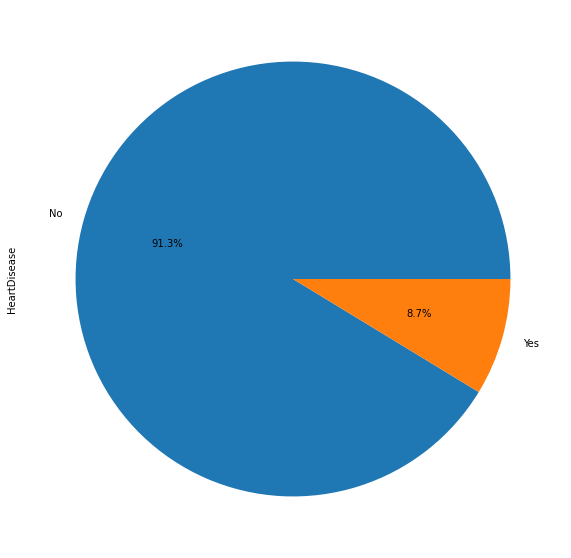

In [17]:
print(df["HeartDisease"].value_counts())
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));


# In the pie chart below, 91.3% people do not have a heart disease
# 8.7% have a heart disease

In [18]:
y = df['HeartDisease']
print(f'Percentage of Heart Disease: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for Heart Disease)\nPercentage of NOT Heart Disease: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT Heart Disease)')

Percentage of Heart Disease: % 8.7 --> (4352 cases for Heart Disease)
Percentage of NOT Heart Disease: % 91.3 --> (45648 cases for NOT Heart Disease)


In [19]:
df['HeartDisease'].describe()

count     50000
unique        2
top          No
freq      45648
Name: HeartDisease, dtype: object

In [20]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


Categorical Columns: Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [21]:
df[numerical].head().T

,0,1,2,3,4
BMI,16.6,20.34,26.58,24.21,23.71
PhysicalHealth,3.0,0.00,20.00,0.00,28.00
MentalHealth,30.0,0.00,30.00,0.00,0.00
SleepTime,5.0,7.00,8.00,6.00,8.00


In [22]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,50000.0,27.971388,6.239799,12.4,23.71,26.96,31.01,87.05
PhysicalHealth,50000.0,3.539560,8.094921,0.0,0.00,0.00,2.00,30.00
MentalHealth,50000.0,3.984260,7.979439,0.0,0.00,0.00,4.00,30.00
SleepTime,50000.0,7.129380,1.496130,1.0,6.00,7.00,8.00,24.00


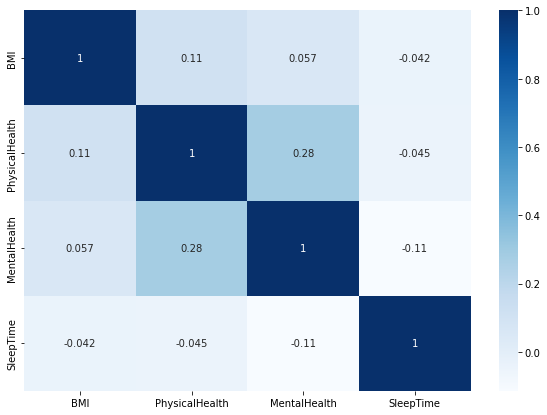

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

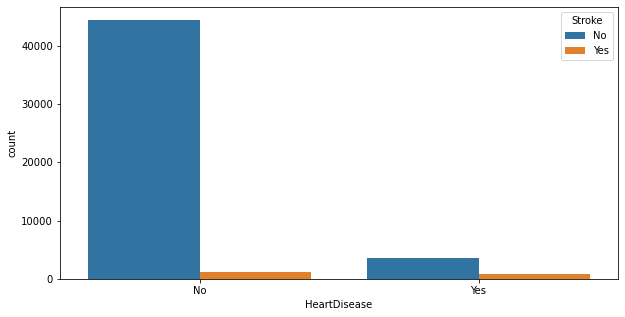

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.HeartDisease,hue=df.Stroke)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

In [25]:
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
BMI,50000.000000,27.971388,6.239799,12.400000,23.710000,26.960000,31.010000,87.050000
PhysicalHealth,50000.000000,3.539560,8.094921,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,50000.000000,3.984260,7.979439,0.000000,0.000000,0.000000,4.000000,30.000000
SleepTime,50000.000000,7.129380,1.496130,1.000000,6.000000,7.000000,8.000000,24.000000


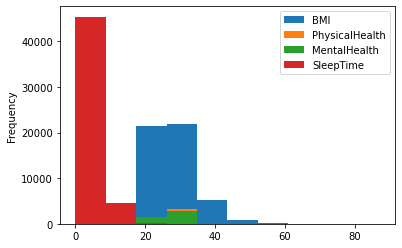

In [26]:
df[numerical].plot(kind='hist');

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

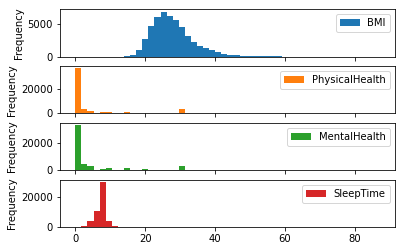

In [27]:
df[numerical].plot(kind='hist', subplots=True,bins=50)

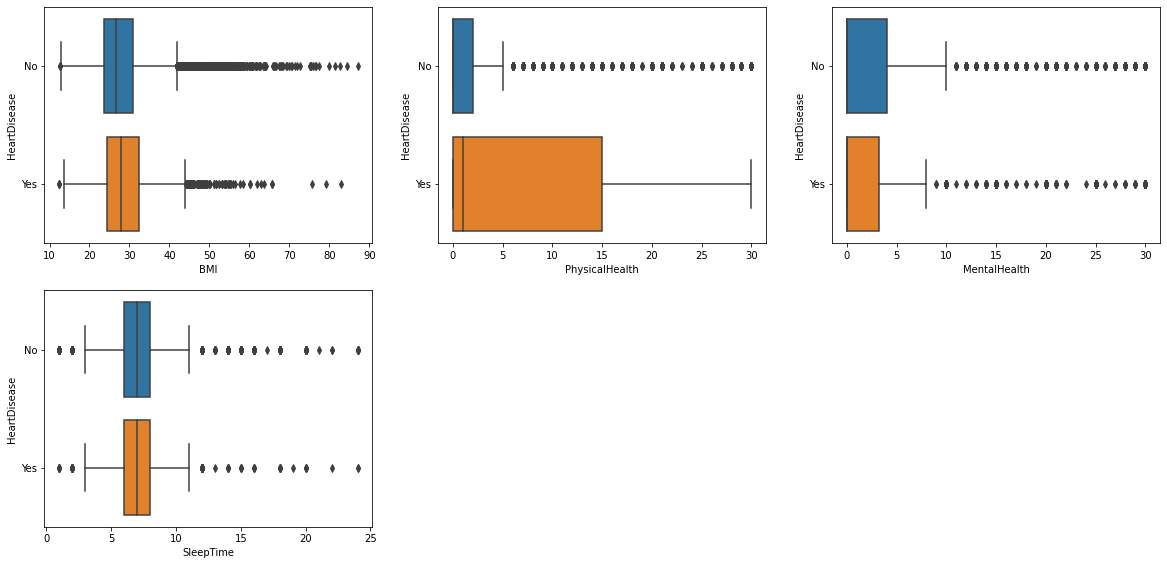

In [28]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(y='HeartDisease', x=feature, data=df)    

In [29]:
df[categorical].head().T

,0,1,2,3,4
HeartDisease,No,No,No,No,No
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
DiffWalking,No,No,No,No,Yes
Sex,Female,Female,Male,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44
Race,White,White,White,White,White
Diabetic,Yes,No,Yes,No,No
PhysicalActivity,Yes,Yes,Yes,No,Yes


In [30]:
df[categorical].describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,45648,28921,46569,48028,42830,26476,5230,35845,42265,38924,17384,43028,48091,44459


In [31]:
df["Sex"].value_counts()

Female    26476
Male      23524
Name: Sex, dtype: int64

In [32]:
df.shape

(50000, 18)

In [33]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [34]:
df[categorical].value_counts()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex     AgeCategory  Race   Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer
No            No       No               No      No           Female  70-74        White  No        Yes               Very good  No      No             No            237
                                                                     65-69        White  No        Yes               Very good  No      No             No            234
                                                                     60-64        White  No        Yes               Very good  No      No             No            228
                                                                     55-59        White  No        Yes               Very good  No      No             No            225
                                                             Male    18-24        White  No        Yes               Excellent  No      No             No         

In [35]:
df = pd.get_dummies(df, drop_first=True)

In [36]:
df.shape

(50000, 38)

In [37]:
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [38]:
dff = df.copy()

In [39]:
df['HeartDisease_Yes'].value_counts()

0    45648
1     4352
Name: HeartDisease_Yes, dtype: int64

# TRAIN | TEST SPLIT & HANDLING WITH MISSING VALUES

In [40]:
#Train | Test Split

X = df.drop(["HeartDisease_Yes"], axis=1)
y = df["HeartDisease_Yes"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 101)

In [42]:
missing(df)

,Missing_Number,Missing_Percent
BMI,0,0.0
Diabetic_Yes,0,0.0
AgeCategory_80 or older,0,0.0
Race_Asian,0,0.0
Race_Black,0,0.0
Race_Hispanic,0,0.0
Race_Other,0,0.0
Race_White,0,0.0
"Diabetic_No, borderline diabetes",0,0.0
Diabetic_Yes (during pregnancy),0,0.0


In [43]:
# In our dataset, there have been no missing values so there is no need to handle with them.

# SCALING

In [44]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_test_scaled = scaler.transform(X_test)

# SVM(Support Vector Machine)

[[13666    28]
 [ 1260    46]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     13694
           1       0.62      0.04      0.07      1306

    accuracy                           0.91     15000
   macro avg       0.77      0.52      0.51     15000
weighted avg       0.89      0.91      0.88     15000

--------------------------------------------------------


,train_set,test_set
Accuracy,0.917057,0.914133
Precision,0.835681,0.621622
Recall,0.058437,0.035222
f1,0.109236,0.066667


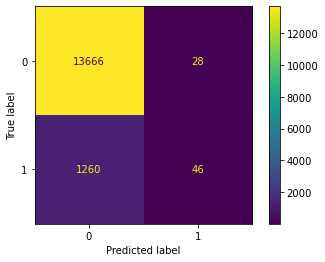

In [47]:
SVM_model = SVC(random_state=42)
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)
y_train_pred = SVM_model.predict(X_train_scaled)

svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[31919    35]
 [ 2868   178]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31954
           1       0.84      0.06      0.11      3046

    accuracy                           0.92     35000
   macro avg       0.88      0.53      0.53     35000
weighted avg       0.91      0.92      0.88     35000

--------------------------------------------------------


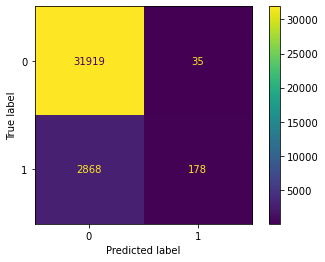

In [48]:
y_train_pred = SVM_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_train_scaled, y_train);

In [49]:
svm_xvalid_model = SVC()

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,31.616306,1.938358,0.914857,0.714286,0.032895,0.062893
2,37.441739,1.916951,0.913429,0.514286,0.059211,0.106195
3,30.428343,1.952685,0.914857,0.625000,0.049342,0.091463
4,38.499897,1.947328,0.913714,0.562500,0.029605,0.056250
5,30.618247,1.924937,0.916571,0.809524,0.055738,0.104294
6,40.107367,1.966654,0.914286,0.666667,0.032787,0.062500
7,37.720995,1.925036,0.913429,0.583333,0.022951,0.044164
8,38.062622,1.915128,0.912286,0.466667,0.045902,0.083582
9,39.097327,2.154729,0.913714,0.615385,0.026230,0.050314
10,45.227801,1.937781,0.912857,0.500000,0.032787,0.061538


In [50]:
svm_xvalid_model_scores.mean()[2:]

test_accuracy     0.914000
test_precision    0.605765
test_recall       0.038745
test_f1           0.072319
dtype: float64

In [51]:
param_grid = {'gamma': ["scale", "auto", 0.1,0.01],
              'kernel': ['rbf']}

In [52]:
SVM_grid_model = SVC(random_state=42)

SVM_grid_model = GridSearchCV(SVM_grid_model, param_grid, verbose=3, refit=True)

In [53]:
SVM_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...........gamma=scale, kernel=rbf;, score=0.914 total time=  31.0s
[CV 2/5] END ...........gamma=scale, kernel=rbf;, score=0.914 total time=  25.9s
[CV 3/5] END ...........gamma=scale, kernel=rbf;, score=0.915 total time=  25.6s
[CV 4/5] END ...........gamma=scale, kernel=rbf;, score=0.913 total time=  30.6s
[CV 5/5] END ...........gamma=scale, kernel=rbf;, score=0.914 total time=  25.8s
[CV 1/5] END ............gamma=auto, kernel=rbf;, score=0.913 total time=  20.6s
[CV 2/5] END ............gamma=auto, kernel=rbf;, score=0.913 total time=  18.6s
[CV 3/5] END ............gamma=auto, kernel=rbf;, score=0.913 total time=  20.5s
[CV 4/5] END ............gamma=auto, kernel=rbf;, score=0.913 total time=  20.5s
[CV 5/5] END ............gamma=auto, kernel=rbf;, score=0.913 total time=  17.3s
[CV 1/5] END .............gamma=0.1, kernel=rbf;, score=0.914 total time=  19.4s
[CV 2/5] END .............gamma=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

[[13666    28]
 [ 1260    46]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     13694
           1       0.62      0.04      0.07      1306

    accuracy                           0.91     15000
   macro avg       0.77      0.52      0.51     15000
weighted avg       0.89      0.91      0.88     15000

--------------------------------------------------------


,train_set,test_set
Accuracy,0.917057,0.914133
Precision,0.835681,0.621622
Recall,0.058437,0.035222
f1,0.109236,0.066667


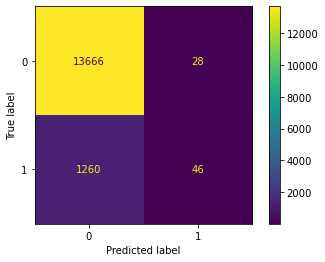

In [54]:
y_pred = SVM_grid_model.predict(X_test_scaled)
y_train_pred = SVM_grid_model.predict(X_train_scaled)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

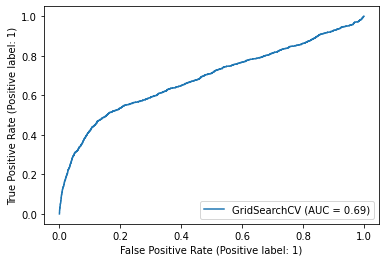

In [55]:
plot_roc_curve(SVM_grid_model, X_test_scaled, y_test);

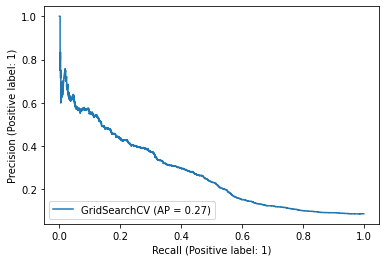

In [56]:
plot_precision_recall_curve(SVM_grid_model, X_test_scaled, y_test);

# Logistic Regression 

[[13574   120]
 [ 1149   157]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     13694
           1       0.57      0.12      0.20      1306

    accuracy                           0.92     15000
   macro avg       0.74      0.56      0.58     15000
weighted avg       0.89      0.92      0.89     15000

--------------------------------------------------------


,train_set,test_set
Accuracy,0.914286,0.915400
Precision,0.535714,0.566787
Recall,0.113263,0.120214
f1,0.186992,0.198358


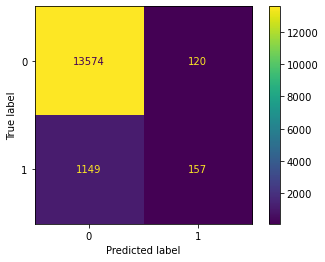

In [57]:
LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [58]:
y_pred_proba = LR_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99483466, 0.00516534],
       [0.98814087, 0.01185913],
       [0.14133897, 0.85866103],
       ...,
       [0.89151851, 0.10848149],
       [0.93939607, 0.06060393],
       [0.89565357, 0.10434643]])

In [59]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,HeartDisease_Yes,pred,pred_proba
47373,54.03,30.0,10.0,8.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.206224
315,23.03,30.0,0.0,7.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.129044
33327,21.63,0.0,2.0,8.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.062913
5248,30.67,1.0,0.0,8.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.077050
34412,27.76,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0.107428
17968,22.96,0.0,0.0,8.0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0.190135
8771,26.57,5.0,1.0,6.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.339053
46986,19.33,0.0,0.0,8.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.028716
11600,27.67,4.0,10.0,7.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.047295
24785,28.70,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.050630


In [60]:
log_xvalid_model = LogisticRegression()

log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                          'f1'], cv = 10)
log_xvalid_model_scores = pd.DataFrame(log_xvalid_model_scores, index = range(1, 11))

log_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.166490,0.015629,0.916000,0.578125,0.121711,0.201087
2,0.171857,0.000000,0.909429,0.419753,0.111842,0.176623
3,0.241377,0.000000,0.916000,0.564103,0.144737,0.230366
4,0.162969,0.004142,0.914286,0.537037,0.095395,0.162011
5,0.156236,0.000000,0.914571,0.545455,0.118033,0.194070
6,0.197668,0.015621,0.916857,0.634615,0.108197,0.184874
7,0.180516,0.000000,0.910571,0.423077,0.072131,0.123249
8,0.210568,0.015629,0.913429,0.513889,0.121311,0.196286
9,0.156325,0.000000,0.915714,0.589286,0.108197,0.182825
10,0.156143,0.015624,0.915429,0.567164,0.124590,0.204301


In [61]:
log_xvalid_model_scores.mean()[2:]

test_accuracy     0.914229
test_precision    0.537250
test_recall       0.112614
test_f1           0.185569
dtype: float64

In [62]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [63]:
LR_grid_model = LogisticRegression(solver='saga', max_iter=1000, class_weight = "balanced")

LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [64]:
LR_grid_model.fit(X_train_scaled, y_train)

C:\Users\ssethi22\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ssethi22\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ssethi22\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ssethi22\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ssethi22\An

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

[[10406  3288]
 [  297  1009]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     13694
           1       0.23      0.77      0.36      1306

    accuracy                           0.76     15000
   macro avg       0.60      0.77      0.61     15000
weighted avg       0.91      0.76      0.81     15000

--------------------------------------------------------


,train_set,test_set
Accuracy,0.756771,0.761000
Precision,0.235306,0.234815
Recall,0.797768,0.772588
f1,0.363419,0.360164


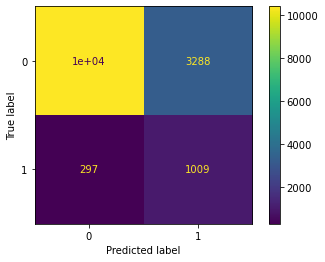

In [65]:
y_pred = LR_grid_model.predict(X_test_scaled)
y_train_pred = LR_grid_model.predict(X_train_scaled)

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_acc = accuracy_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

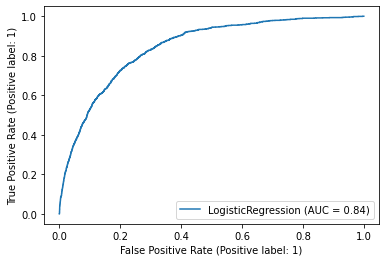

In [66]:
plot_roc_curve(LR_model, X_test_scaled, y_test, response_method='auto');

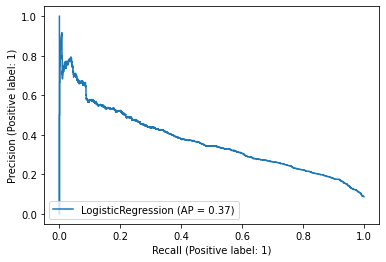

In [67]:
plot_precision_recall_curve(LR_model, X_test_scaled, y_test);

In [68]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [69]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.07952452268758366

In [70]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)
df_roc_curve

,fp_rate,tp_rate,thresholds
0,0.000000,0.000000,1.884223
1,0.000073,0.000000,0.884223
2,0.000073,0.008423,0.797413
3,0.000219,0.008423,0.787045
4,0.000219,0.009188,0.786770
...,...,...,...
2055,0.981890,0.998469,0.002539
2056,0.981890,0.999234,0.002539
2057,0.996787,0.999234,0.001469
2058,0.996787,1.000000,0.001464


In [71]:
df_roc_curve.iloc[optimal_idx]

fp_rate       0.266978
tp_rate       0.802450
thresholds    0.079525
Name: 1463, dtype: float64

# AdaBoost

[[13557   137]
 [ 1143   163]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13694
           1       0.54      0.12      0.20      1306

    accuracy                           0.91     15000
   macro avg       0.73      0.56      0.58     15000
weighted avg       0.89      0.91      0.89     15000

--------------------------------------------------------


,train_set,test_set
Accuracy,0.914371,0.914667
Precision,0.533424,0.543333
Recall,0.128365,0.124809
f1,0.206933,0.202989


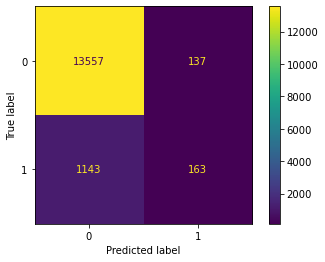

In [72]:
AB_model = AdaBoostClassifier(n_estimators=50, random_state=101)
AB_model.fit(X_train, y_train)
y_pred = AB_model.predict(X_test)
y_train_pred = AB_model.predict(X_train)

ab_f1 = f1_score(y_test, y_pred)
ab_acc = accuracy_score(y_test, y_pred)
ab_recall = recall_score(y_test, y_pred)
ab_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[31612   342]
 [ 2655   391]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     31954
           1       0.53      0.13      0.21      3046

    accuracy                           0.91     35000
   macro avg       0.73      0.56      0.58     35000
weighted avg       0.89      0.91      0.89     35000

--------------------------------------------------------


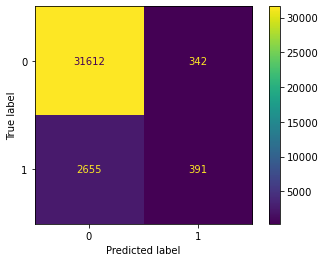

In [73]:
y_train_pred = AB_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

In [74]:
ab_xvalid_model = AdaBoostClassifier(n_estimators=50, random_state=101)

ab_xvalid_model_scores = cross_validate(ab_xvalid_model, X_train, y_train, scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
ab_xvalid_model_scores = pd.DataFrame(ab_xvalid_model_scores, index = range(1, 11))

ab_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.830000,0.031161,0.914286,0.527778,0.125000,0.202128
2,0.835189,0.031177,0.906857,0.396226,0.138158,0.204878
3,0.812486,0.015548,0.915714,0.549451,0.164474,0.253165
4,0.812495,0.031236,0.912857,0.492754,0.111842,0.182306
5,0.796800,0.031243,0.914571,0.538462,0.137705,0.219321
6,0.796792,0.015621,0.915714,0.580645,0.118033,0.196185
7,0.798516,0.031250,0.911429,0.460317,0.095082,0.157609
8,0.791909,0.031247,0.913429,0.512195,0.137705,0.217054
9,0.790339,0.031256,0.917429,0.611111,0.144262,0.233422
10,0.791804,0.031248,0.914571,0.537500,0.140984,0.223377


In [75]:
ab_xvalid_model_scores.mean()

fit_time          0.805633
score_time        0.028098
test_accuracy     0.913686
test_precision    0.520644
test_recall       0.131324
test_f1           0.208944
dtype: float64

In [76]:
AB_model = AdaBoostClassifier(n_estimators=3, random_state=42)
AB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [77]:
df.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)',
       'PhysicalActivity_Yes', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes'],
      dtype='object')

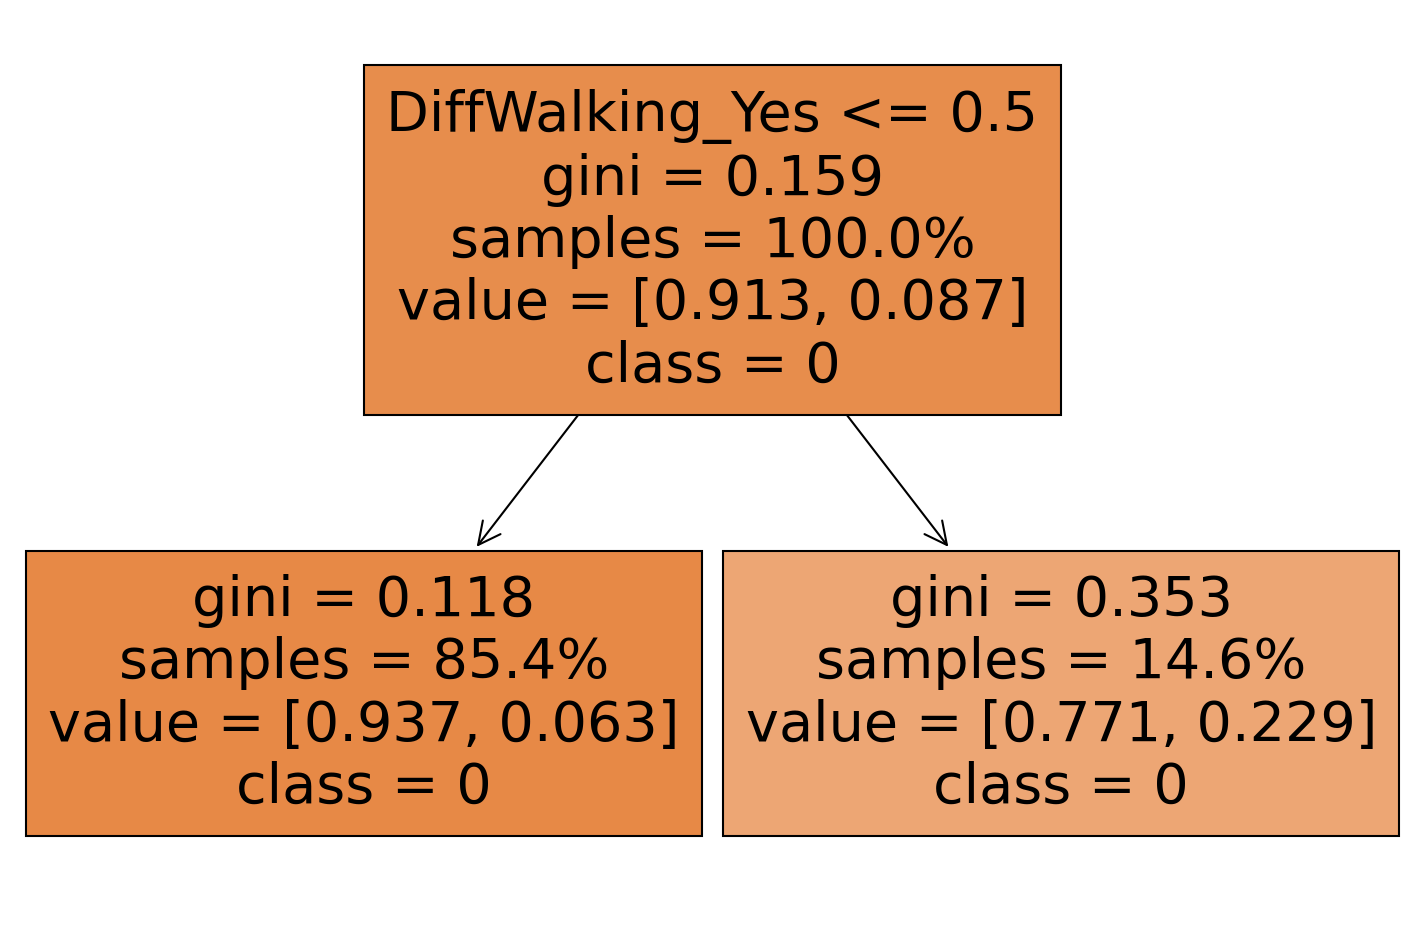

In [78]:
features = list(X.columns)
targets = df["HeartDisease_Yes"].astype("str")

plt.figure(figsize=(12, 8),dpi=150)
plot_tree(AB_model.estimators_[0], filled=True, feature_names=features, class_names=targets.unique(), proportion=True);

In [79]:
error_rates = []

for n in range(1, 100):
    
    AB_model = AdaBoostClassifier(n_estimators=n)
    AB_model.fit(X_train, y_train)
    preds = AB_model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)

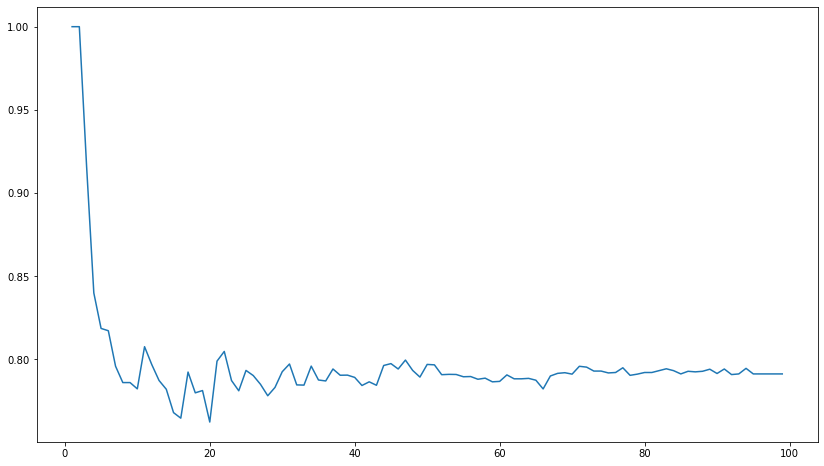

In [80]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 100), error_rates);

In [81]:
AB_model.feature_importances_

array([0.24242424, 0.02020202, 0.03030303, 0.07070707, 0.02020202,
       0.        , 0.02020202, 0.05050505, 0.01010101, 0.01010101,
       0.02020202, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.01010101, 0.01010101, 0.02020202, 0.02020202, 0.02020202,
       0.03030303, 0.01010101, 0.01010101, 0.01010101, 0.01010101,
       0.        , 0.01010101, 0.03030303, 0.01010101, 0.        ,
       0.06060606, 0.06060606, 0.05050505, 0.06060606, 0.01010101,
       0.01010101, 0.01010101])

In [82]:
AB_feature_imp = pd.DataFrame(index = X.columns, data = AB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
AB_feature_imp

,Feature Importance
BMI,0.242424
SleepTime,0.070707
GenHealth_Very good,0.060606
GenHealth_Good,0.060606
GenHealth_Fair,0.060606
GenHealth_Poor,0.050505
DiffWalking_Yes,0.050505
MentalHealth,0.030303
Diabetic_Yes,0.030303
AgeCategory_80 or older,0.030303


In [83]:
imp_feats = AB_feature_imp.sort_values("Feature Importance")

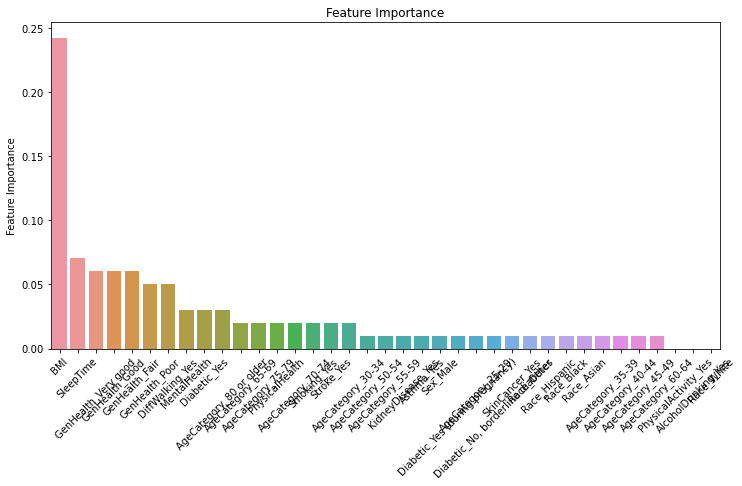

In [84]:
plt.figure(figsize=(12,6))

sns.barplot(y=AB_feature_imp["Feature Importance"], x=AB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [85]:
learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    ab = AdaBoostClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    ab.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(ab.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(ab.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.913
Accuracy score (test): 0.913

Learning rate:  0.1
Accuracy score (training): 0.913
Accuracy score (test): 0.913

Learning rate:  0.15
Accuracy score (training): 0.913
Accuracy score (test): 0.913

Learning rate:  0.25
Accuracy score (training): 0.913
Accuracy score (test): 0.913

Learning rate:  0.5
Accuracy score (training): 0.914
Accuracy score (test): 0.915

Learning rate:  0.6
Accuracy score (training): 0.914
Accuracy score (test): 0.916

Learning rate:  0.75
Accuracy score (training): 0.913
Accuracy score (test): 0.915

Learning rate:  0.85
Accuracy score (training): 0.914
Accuracy score (test): 0.914

Learning rate:  1
Accuracy score (training): 0.913
Accuracy score (test): 0.915



In [86]:
param_grid = {"n_estimators": [15, 20, 100, 500], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}

In [87]:
AB_grid_model = AdaBoostClassifier(random_state=42)
AB_grid_model = GridSearchCV(AB_grid_model, param_grid, cv=5, scoring= 'f1')

In [88]:
AB_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25,
                                           1.5],
                         'n_estimators': [15, 20, 100, 500]},
             scoring='f1')

[[13529   165]
 [ 1117   189]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13694
           1       0.53      0.14      0.23      1306

    accuracy                           0.91     15000
   macro avg       0.73      0.57      0.59     15000
weighted avg       0.89      0.91      0.89     15000

--------------------------------------------------------


,train_set,test_set
Accuracy,0.912943,0.914533
Precision,0.499395,0.533898
Recall,0.135588,0.144717
f1,0.213271,0.227711


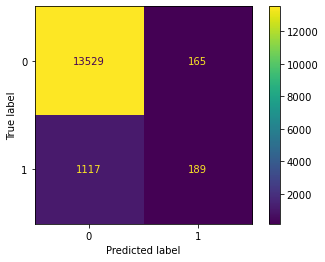

In [89]:
y_pred = AB_grid_model.predict(X_test)
y_train_pred = AB_grid_model.predict(X_train)

ab_grid_f1 = f1_score(y_test, y_pred)
ab_grid_acc = accuracy_score(y_test, y_pred)
ab_grid_recall = recall_score(y_test, y_pred)
ab_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_grid_model, X_test, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

[[31540   414]
 [ 2633   413]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     31954
           1       0.50      0.14      0.21      3046

    accuracy                           0.91     35000
   macro avg       0.71      0.56      0.58     35000
weighted avg       0.89      0.91      0.89     35000

--------------------------------------------------------


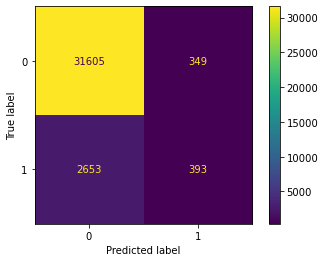

In [90]:
y_train_pred = AB_grid_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

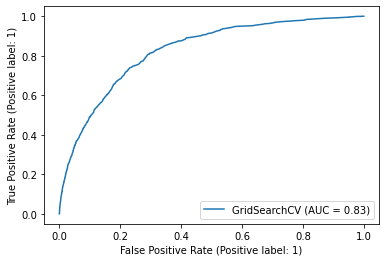

In [91]:
plot_roc_curve(AB_grid_model, X_test, y_test);

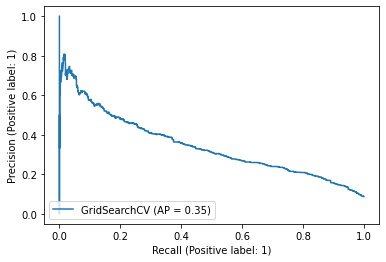

In [92]:
plot_precision_recall_curve(AB_grid_model, X_test, y_test);